In [1]:
%load_ext tensorboard

In [3]:
import datetime, os
import tensorflow as tf

from pathlib import Path
from matplotlib import pyplot as plt
from quickdraw import QuickDrawDataGroup, QuickDrawData

from tensorflow.keras.preprocessing import image_dataset_from_directory

from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import sparse_categorical_accuracy
from tensorflow.keras.layers import Rescaling

from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization

from tensorflow.keras.callbacks import TensorBoard

In [4]:
image_size = (28, 28)

In [ ]:
def generate_class_images(name, max_drawings, recognized):
    directory = Path("dataset/" + name)

    if not directory.exists():
        directory.mkdir(parents=True)

    images = QuickDrawDataGroup(name, max_drawings=max_drawings, recognized=recognized)
    for img in images.drawings:
        filename = directory.as_posix() + "/" + str(img.key_id) + ".png"
        img.get_image(stroke_width=3).resize(image_size).save(filename)

for label in QuickDrawData().drawing_names:
    generate_class_images(label, max_drawings=1200, recognized=True)

downloading aircraft carrier from https://storage.googleapis.com/quickdraw_dataset/full/binary/aircraft carrier.bin
download complete
loading aircraft carrier drawings
load complete
downloading airplane from https://storage.googleapis.com/quickdraw_dataset/full/binary/airplane.bin
download complete
loading airplane drawings
load complete
downloading alarm clock from https://storage.googleapis.com/quickdraw_dataset/full/binary/alarm clock.bin
download complete
loading alarm clock drawings
load complete
downloading ambulance from https://storage.googleapis.com/quickdraw_dataset/full/binary/ambulance.bin
download complete
loading ambulance drawings
load complete
downloading angel from https://storage.googleapis.com/quickdraw_dataset/full/binary/angel.bin
download complete
loading angel drawings
load complete
downloading animal migration from https://storage.googleapis.com/quickdraw_dataset/full/binary/animal migration.bin
download complete
loading animal migration drawings
load complete
d

In [5]:
batch_size = 32

train_ds = image_dataset_from_directory(
    "dataset",
    validation_split=0.2,
    subset="training",
    seed=123,
    color_mode="grayscale",
    image_size=image_size,
    batch_size=batch_size
)

val_ds = image_dataset_from_directory(
    "dataset",
    validation_split=0.2,
    subset="validation",
    seed=123,
    color_mode="grayscale",
    image_size=image_size,
    batch_size=batch_size
)

Found 414000 files belonging to 345 classes.
Using 331200 files for training.
Found 414000 files belonging to 345 classes.
Using 82800 files for validation.


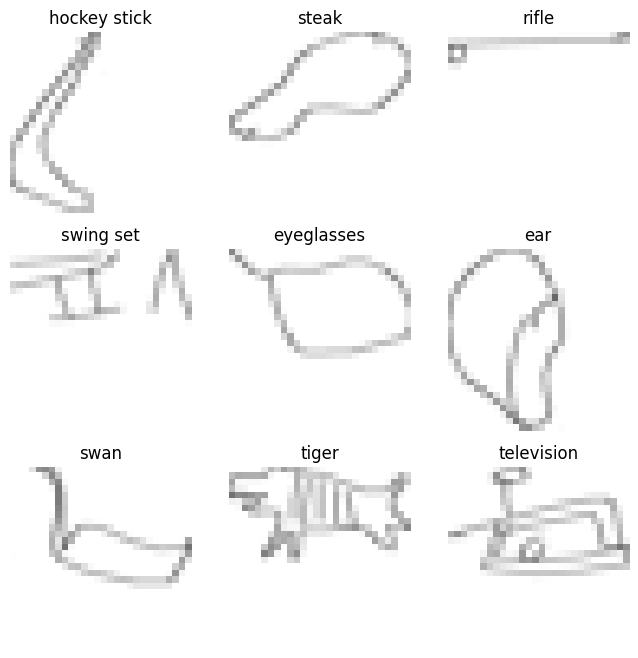

In [5]:
plt.figure(figsize=(8, 8))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        data = images[i].numpy().astype("uint8")
        plt.imshow(data, cmap='gray', vmin=0, vmax=255)
        plt.title(train_ds.class_names[labels[i]])
        plt.axis("off")

In [6]:
input_shape = (28, 28, 1)
n_classes = 345

model = Sequential([
    Rescaling(1. / 255, input_shape=input_shape),
    BatchNormalization(),

    Conv2D(6, kernel_size=(3, 3), padding="same", activation="relu"),
    Conv2D(8, kernel_size=(3, 3), padding="same", activation="relu"),
    Conv2D(10, kernel_size=(3, 3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),

    Dense(700, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(500, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(400, activation='relu'),
    Dropout(0.2),

    Dense(n_classes, activation='softmax')
])

model.compile(
    optimizer="adam",
    loss=SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

model.summary()

C:\Users\tamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 1)      │             4 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 8)      │           440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 10)     │           730 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 28, 10)     │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1960)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 700)            │     1,372,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 700)            │         2,800 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 700)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 500)            │       350,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 500)            │         2,000 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 400)            │       200,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 345)            │       138,345 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,068,019 (7.89 MB)

 Trainable params: 2,065,597 (7.88 MB)

 Non-trainable params: 2,422 (9.46 KB)

In [7]:
epochs = 14

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = TensorBoard(logdir, histogram_freq=1)

history=model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    verbose=1,
    callbacks=[tensorboard_callback]
)


Epoch 1/14
10350/10350 ━━━━━━━━━━━━━━━━━━━━ 1681s 162ms/step - accuracy: 0.2400 - loss: 3.5598 - val_accuracy: 0.4837 - val_loss: 2.0363
Epoch 2/14
10350/10350 ━━━━━━━━━━━━━━━━━━━━ 756s 73ms/step - accuracy: 0.4421 - loss: 2.2497 - val_accuracy: 0.5319 - val_loss: 1.8172
Epoch 3/14
10350/10350 ━━━━━━━━━━━━━━━━━━━━ 749s 72ms/step - accuracy: 0.4970 - loss: 1.9759 - val_accuracy: 0.5279 - val_loss: 1.8436
Epoch 4/14
10350/10350 ━━━━━━━━━━━━━━━━━━━━ 655s 63ms/step - accuracy: 0.5274 - loss: 1.8226 - val_accuracy: 0.5703 - val_loss: 1.6449
Epoch 5/14
10350/10350 ━━━━━━━━━━━━━━━━━━━━ 609s 59ms/step - accuracy: 0.5500 - loss: 1.7174 - val_accuracy: 0.5538 - val_loss: 1.7140
Epoch 6/14
10350/10350 ━━━━━━━━━━━━━━━━━━━━ 630s 61ms/step - accuracy: 0.5660 - loss: 1.6392 - val_accuracy: 0.5805 - val_loss: 1.6097
Epoch 7/14
10350/10350 ━━━━━━━━━━━━━━━━━━━━ 645s 62ms/step - accuracy: 0.5764 - loss: 1.5828 - val_accuracy: 0.5964 - val_loss: 1.5510
Epoch 8/14
10350/10350 ━━━━━━━━━━━━━━━━━━━━ 615s 59ms

In [ ]:
scores = history.evaluate(X_test_cnn, y_test_cnn, verbose=0)
print('Final CNN accuracy: ', scores[1])

Final CNN accuracy:  0.743


2588/2588 ━━━━━━━━━━━━━━━━━━━━ 98s 37ms/step


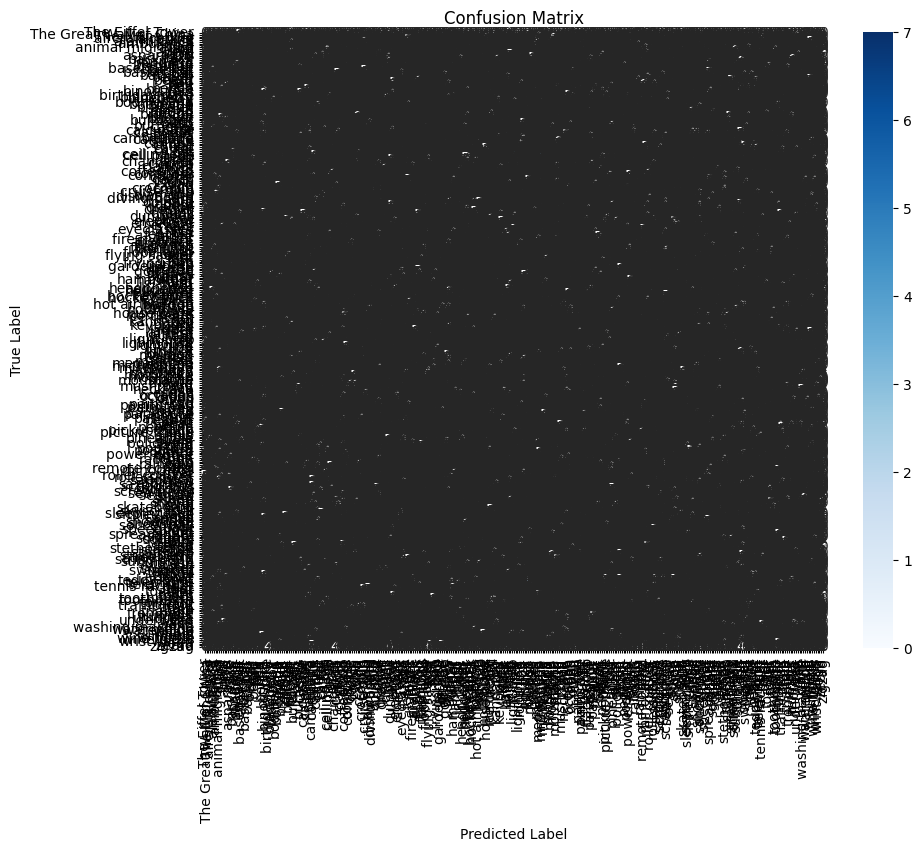

                         precision    recall  f1-score   support

       The Eiffel Tower       0.00      0.00      0.00       210
The Great Wall of China       0.01      0.00      0.01       232
          The Mona Lisa       0.00      0.00      0.00       205
       aircraft carrier       0.01      0.00      0.01       219
               airplane       0.01      0.01      0.01       231
            alarm clock       0.01      0.01      0.01       237
              ambulance       0.00      0.00      0.00       238
                  angel       0.01      0.01      0.01       223
       animal migration       0.00      0.00      0.00       227
                    ant       0.00      0.00      0.00       206
                  anvil       0.01      0.01      0.01       253
                  apple       0.00      0.00      0.00       246
                    arm       0.00      0.00      0.00       233
              asparagus       0.00      0.00      0.00       218
                    axe 

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf

# Generate predictions on the validation dataset
y_pred = np.argmax(model.predict(val_ds), axis=1)

# Extract true labels from the validation dataset
y_true = np.concatenate([y for x, y in val_ds], axis=0)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=val_ds.class_names, yticklabels=val_ds.class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print a classification report for more detailed metrics
print(classification_report(y_true, y_pred, target_names=val_ds.class_names))


2588/2588 ━━━━━━━━━━━━━━━━━━━━ 87s 33ms/step


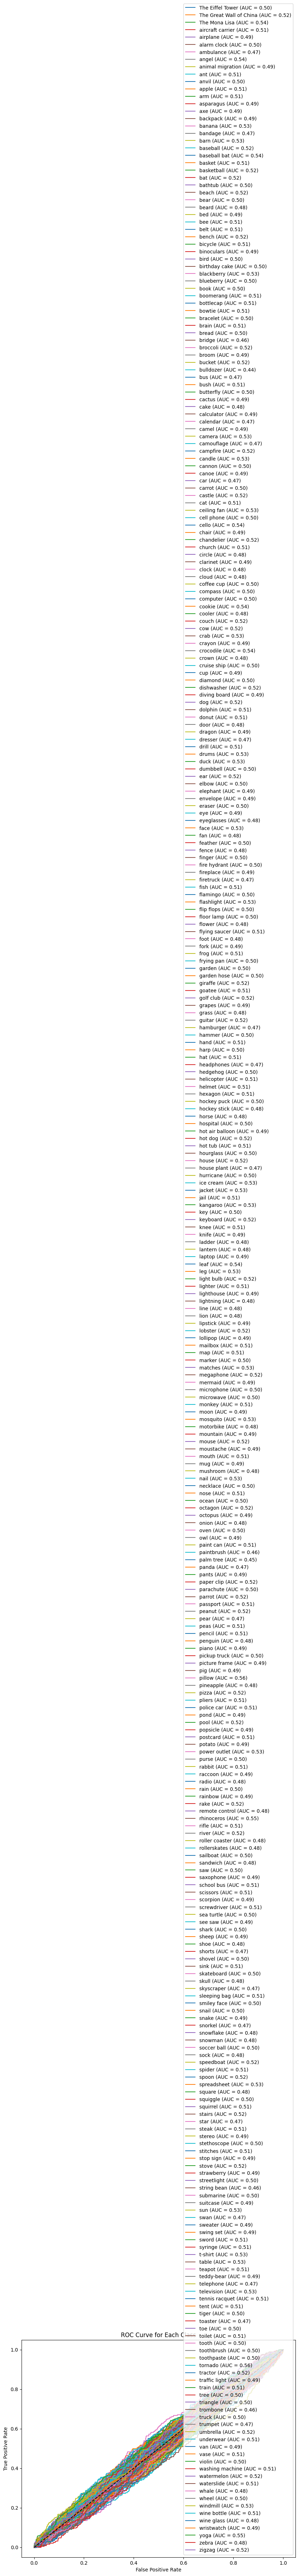

In [13]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the labels for multi-class ROC
y_true_binarized = label_binarize(y_true, classes=range(len(val_ds.class_names)))
y_pred_proba = model.predict(val_ds)  # Probabilities from model predictions

plt.figure(figsize=(10, 8))
for i in range(len(val_ds.class_names)):
    fpr, tpr, _ = roc_curve(y_true_binarized[:, i], y_pred_proba[:, i])
    plt.plot(fpr, tpr, label=f"{val_ds.class_names[i]} (AUC = {auc(fpr, tpr):.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend(loc='lower right')
plt.show()


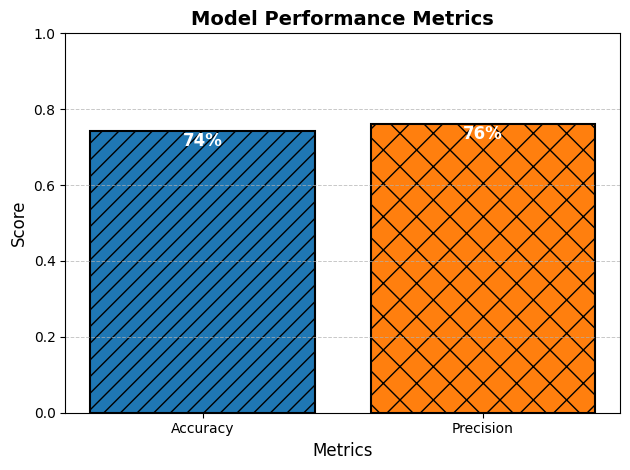

In [ ]:
import matplotlib.pyplot as plt

# Extract metrics from your model's history
accuracy = history.history['accuracy'][-1]  # Last training accuracy
val_accuracy = history.history['val_accuracy'][-1]  # Last validation accuracy

# Set up model metrics and scores
metrics = ['Accuracy', 'Precision']
scores = [accuracy, val_accuracy]  # Replace with model's precision if available

# Set up colors and hatching patterns
colors = ['#1f77b4', '#ff7f0e']  # Blue and Orange colors
hatches = ['/', 'x']  # Hatching styles for bars

# Create the bar chart
bars = plt.bar(metrics, scores, color=colors, edgecolor='black', hatch=hatches, linewidth=1.5)

# Adding percentage labels on top of the bars
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width() / 2, score - 0.05, f'{score * 100:.0f}%', 
             ha='center', va='bottom', color='white', fontsize=12, fontweight='bold')

# Customize the chart
plt.ylim(0, 1)  # Set Y-axis range from 0 to 1
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)  # Add dashed gridlines
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Model Performance Metrics', fontsize=14, fontweight='bold')
plt.tight_layout()

# Show the plot
plt.show()


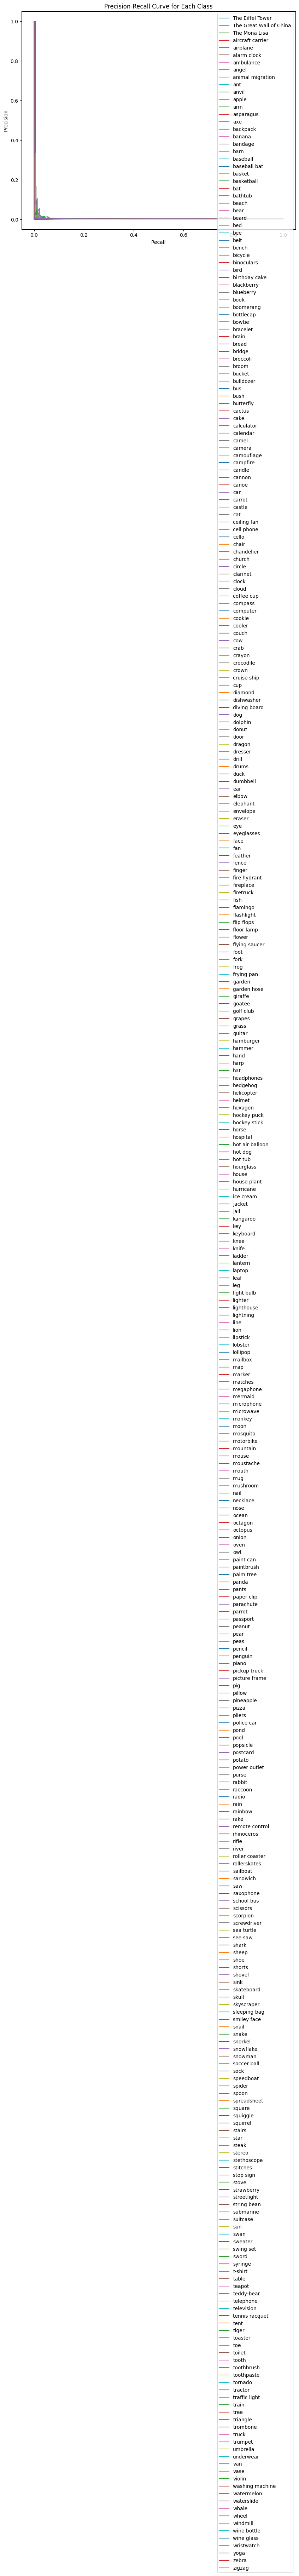

In [15]:
from sklearn.metrics import precision_recall_curve

plt.figure(figsize=(10, 8))
for i in range(len(val_ds.class_names)):
    precision, recall, _ = precision_recall_curve(y_true_binarized[:, i], y_pred_proba[:, i])
    plt.plot(recall, precision, label=f"{val_ds.class_names[i]}")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Each Class')
plt.legend(loc='upper right')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━

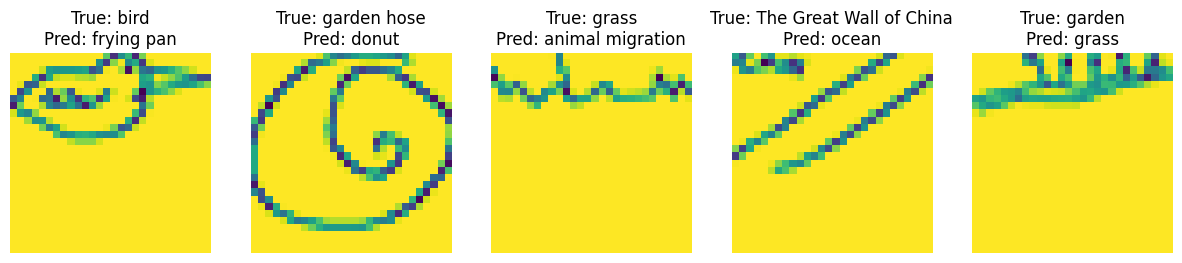

In [16]:
def plot_misclassified_images(dataset, model, num_samples=5):
    plt.figure(figsize=(15, 15))
    count = 0
    for img, label in dataset.unbatch().take(100):  # Adjust as needed
        true_label = label.numpy()
        pred_label = np.argmax(model.predict(tf.expand_dims(img, axis=0)))
        if true_label != pred_label and count < num_samples:
            ax = plt.subplot(1, num_samples, count + 1)
            plt.imshow(img.numpy().astype("uint8"))
            plt.title(f"True: {val_ds.class_names[true_label]}\nPred: {val_ds.class_names[pred_label]}")
            plt.axis("off")
            count += 1

# Display misclassified images
plot_misclassified_images(val_ds, model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━

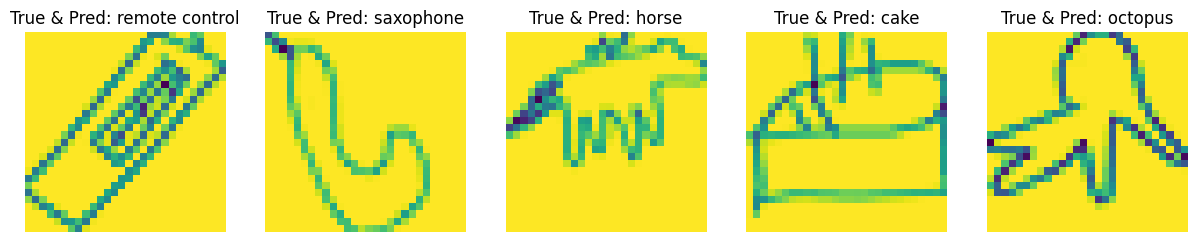

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

def plot_correctly_classified_images(dataset, model, num_samples=5):
    plt.figure(figsize=(15, 15))
    count = 0
    for img, label in dataset.unbatch().take(100):  # Adjust as needed
        true_label = label.numpy()
        pred_label = np.argmax(model.predict(tf.expand_dims(img, axis=0)))
        
        # Check if the prediction matches the true label
        if true_label == pred_label and count < num_samples:
            ax = plt.subplot(1, num_samples, count + 1)
            plt.imshow(img.numpy().astype("uint8"))
            plt.title(f"True & Pred: {val_ds.class_names[true_label]}")
            plt.axis("off")
            count += 1

# Display correctly classified images
plot_correctly_classified_images(val_ds, model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


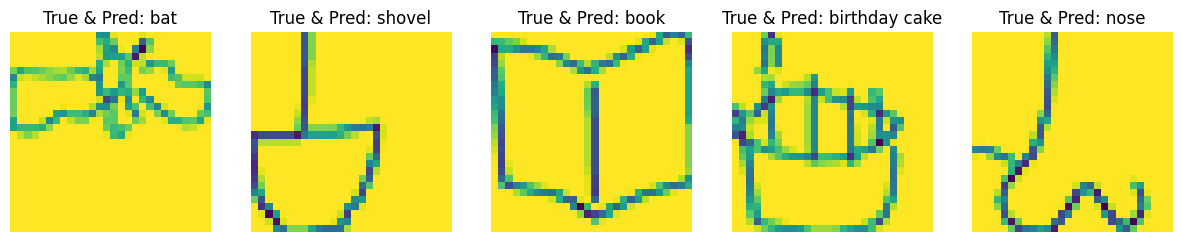

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

def plot_correctly_classified_images(dataset, model, num_samples=5):
    plt.figure(figsize=(15, 15))
    count = 0
    # Loop through the dataset to find correctly classified images
    for img, label in dataset.unbatch():
        true_label = label.numpy()
        pred_label = np.argmax(model.predict(tf.expand_dims(img, axis=0)))
        
        # Check if the prediction matches the true label
        if true_label == pred_label:
            ax = plt.subplot(1, num_samples, count + 1)
            plt.imshow(img.numpy().astype("uint8"))
            plt.title(f"True & Pred: {dataset.class_names[true_label]}")
            plt.axis("off")
            count += 1
        
        if count == num_samples:
            break  # Stop once we've shown enough samples

    plt.show()

# Display correctly classified images
plot_correctly_classified_images(val_ds, model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


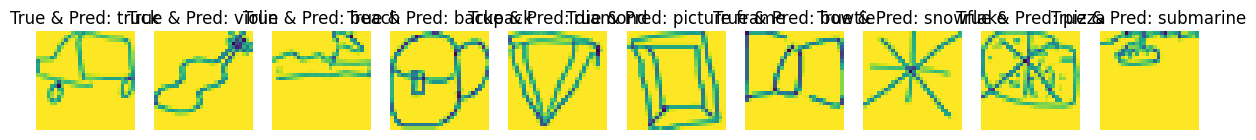

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

def plot_correctly_classified_images(dataset, model, num_samples=10):
    plt.figure(figsize=(15, 15))
    count = 0
    # Loop through the dataset to find correctly classified images
    for img, label in dataset.unbatch():
        true_label = label.numpy()
        pred_label = np.argmax(model.predict(tf.expand_dims(img, axis=0)))
        
        # Check if the prediction matches the true label
        if true_label == pred_label:
            ax = plt.subplot(1, num_samples, count + 1)
            plt.imshow(img.numpy().astype("uint8"))
            plt.title(f"True & Pred: {dataset.class_names[true_label]}")
            plt.axis("off")
            count += 1
        
        if count == num_samples:
            break  # Stop once we've shown enough samples

    plt.show()

# Display 10 correctly classified images
plot_correctly_classified_images(val_ds, model, num_samples=10)


In [ ]:
# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model("models/model_20220220-184035") # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
%tensorboard --logdir logs